In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("vgsales_dirty.csv")
print(data.head(5))


   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


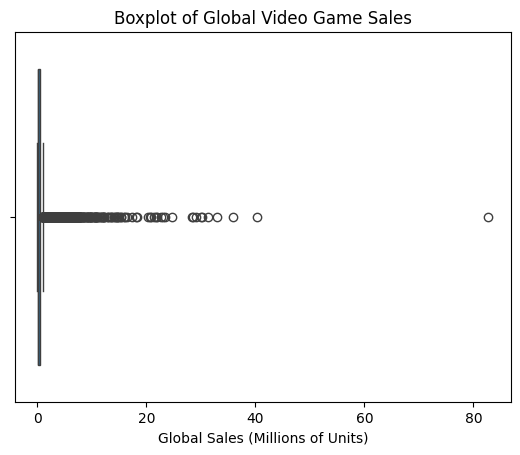

In [3]:
sns.boxplot(x=data["Global_Sales"])

plt.title("Boxplot of Global Video Game Sales")
plt.xlabel("Global Sales (Millions of Units)")

plt.show()

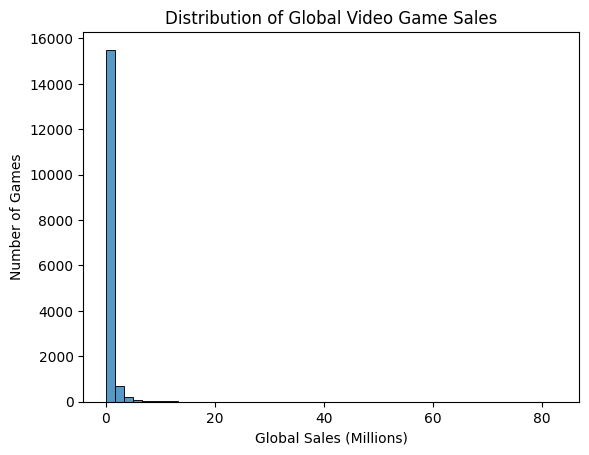

In [4]:
sns.histplot(data["Global_Sales"], bins=50)

plt.title("Distribution of Global Video Game Sales")
plt.xlabel("Global Sales (Millions)")
plt.ylabel("Number of Games")

plt.show()



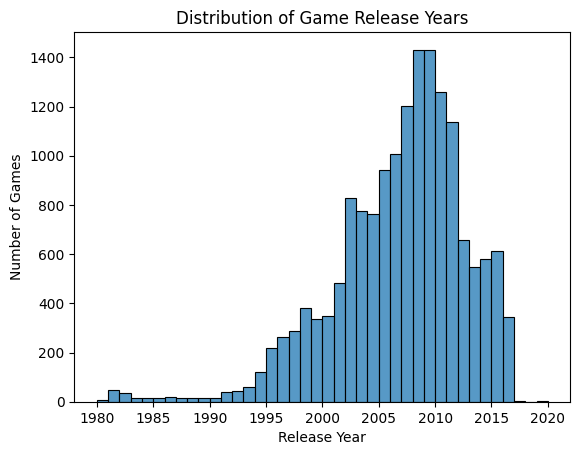

In [5]:
sns.histplot(data["Year"], bins=40)

plt.title("Distribution of Game Release Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Games")

plt.show()

In [6]:
print(data.info())
print(data.describe())
print(data.shape)
print(data.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None
               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.8

In [7]:
data.columns = (
    data.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

data.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [8]:
data["publisher"] = data["publisher"].replace("nan", "Unknown")
data["publisher"] = data["publisher"].fillna("Unknown")
print(data["publisher"].isna().sum())


0


In [9]:
data = data.dropna(subset=["year"])
print("After dropping missing years:", data.shape)


After dropping missing years: (16327, 11)


In [10]:
data.duplicated().sum()
data = data.drop_duplicates()

In [11]:
sales_cols = ["na_sales","eu_sales","jp_sales","other_sales","global_sales"]
for col in sales_cols:
    data[col] = pd.to_numeric(data[col], errors="coerce")


In [12]:
data.to_csv("vgsales_cleaned.csv", index=False)

print("File saved as vgsales_cleaned.csv")


File saved as vgsales_cleaned.csv


# EDA

## Loading the dataset

In [13]:
cleanData = pd.read_csv("vgsales_cleaned.csv")
display(cleanData.head(10))

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


**Data description:**<br>
- rank - rank
- name - categorical nominal
- platform - categorical nominal
- year - numerical discrete
- genre - categorical nominal
- publisher - categorical nominal
- na_sales - numerical continuous
- eu_sales - numerical continuous
- jp_sales - numerical continuous
- other_sales - numerical continuous
- global_sales - numerical continuous

## Univariate

**platform**

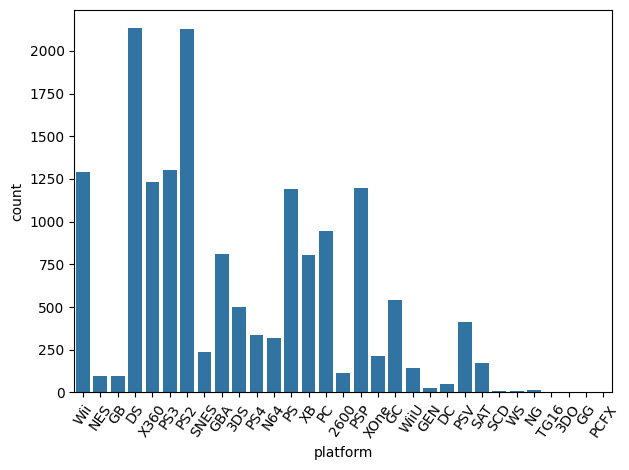

In [19]:
sns.countplot(x = "platform", data = cleanData)
plt.xticks(rotation = 55)
plt.tight_layout()
plt.show()

**year**

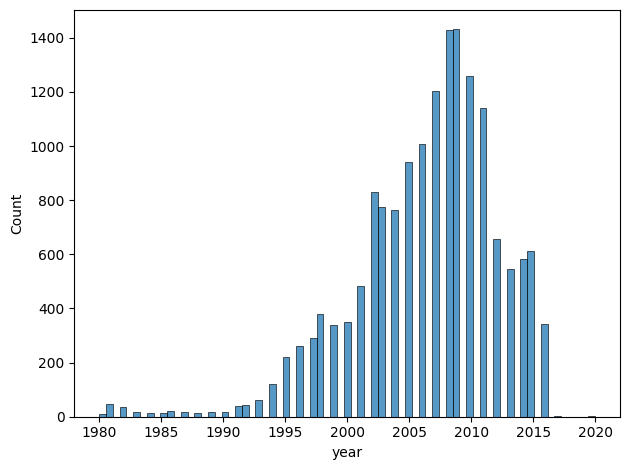

In [20]:
sns.histplot(x = "year", data = cleanData)
plt.tight_layout()
plt.show()

**genre**

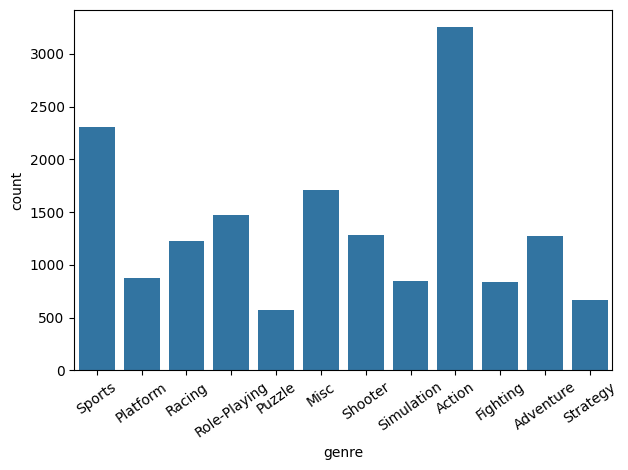

In [22]:
sns.countplot(x = "genre", data = cleanData)
plt.xticks(rotation = 35)
plt.tight_layout()
plt.show()

**publisher**

Too many distinct publishers to display it in a nice way.

**na_sales**

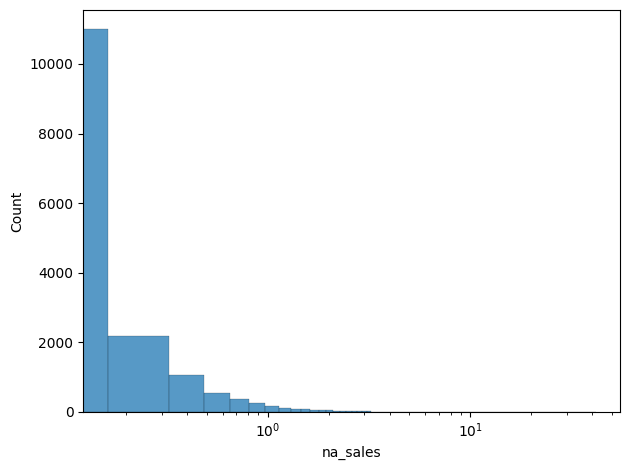

In [25]:
sns.histplot(cleanData["na_sales"])
plt.xscale("log")
plt.tight_layout()
plt.show()

**eu_sales**

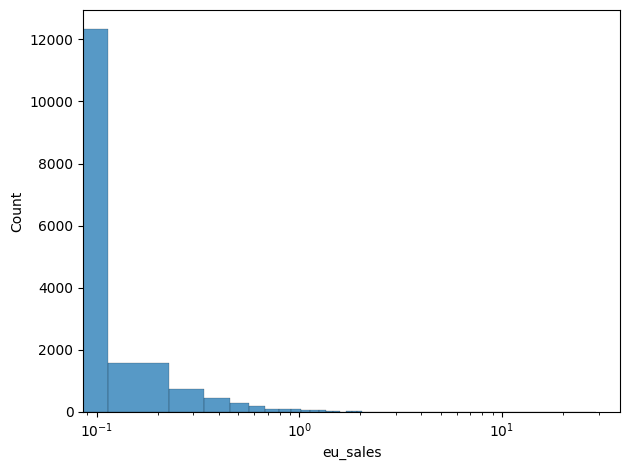

In [26]:
sns.histplot(cleanData["eu_sales"])
plt.xscale("log")
plt.tight_layout()
plt.show()

**jp_sales**

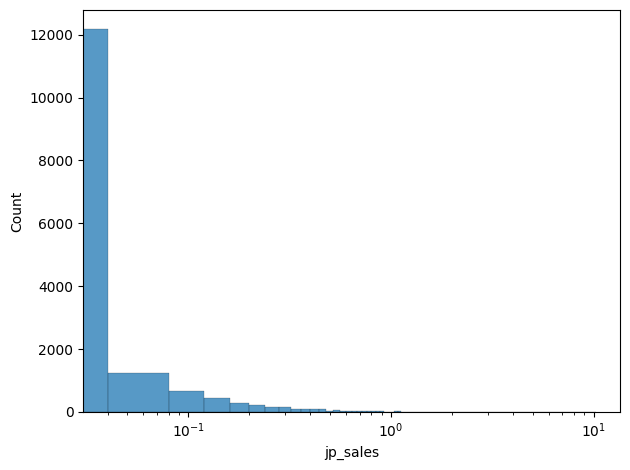

In [ ]:
sns.histplot(cleanData["jp_sales"])
plt.xscale("log")
plt.tight_layout()
plt.show()

**other_sales**

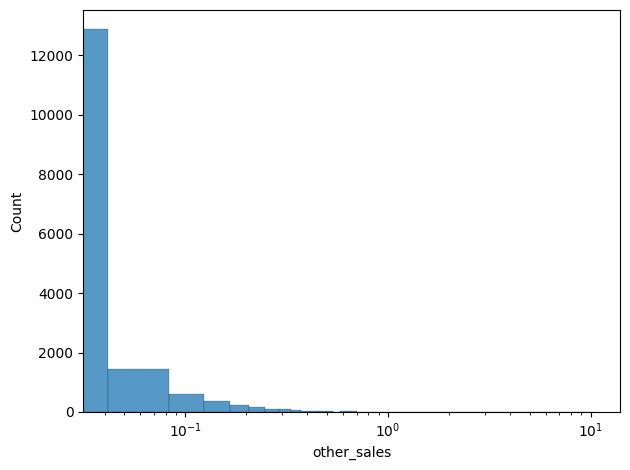

In [30]:
sns.histplot(cleanData["other_sales"])
plt.xscale("log")
plt.tight_layout()
plt.show()

**global_sales**

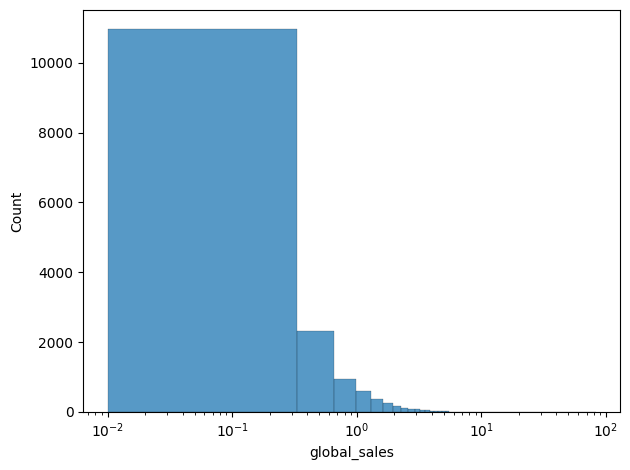

In [33]:
sns.histplot(cleanData["global_sales"])
plt.xscale("log")
plt.tight_layout()
plt.show()